# Progetto Programmazione Data Intesive

- Utilizzo di dataset contenti risultati di partite e informazioni su vai oggetti e personaggi di un famoso videogioco
- 

In [26]:
import os
from urllib.request import urlretrieve
from zipfile import ZipFile

# constants
URL = "https://www.kaggle.com/api/v1/datasets/download/datasnaek/league-of-legends"
DATA_DIR = "data/"
ZIP_NAME = "compressed.zip"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

os.chdir(os.path.join(os.getcwd(), DATA_DIR))

if not os.path.exists(ZIP_NAME):
    # scarica il file dall'URL indicato
    urlretrieve(URL, ZIP_NAME)
    # apri il file zip ed estrai tutto il contenuto nella directory corrente
    with ZipFile(ZIP_NAME) as f:
        f.extractall()

In [27]:
import pandas as pd

#JSON_FILENAMES = ("champion_info.json", "champion_info_2.json", "summoner_spell_info.json")
#champion_info, champion_info2, summoner_spells = (pd.read_json(filename) for filename in JSON_FILENAMES)

UNCOMPRESSED_NAME = "games.csv"

games_data = pd.read_csv(UNCOMPRESSED_NAME)

# Caricamento dei dati
- `gameId`: Riferimento univoco ad una partita
- `creationTime`: Il momento in cui è stata creata la partita (in Epoch format)
- `gameDuration`: Durata del game (in secondi)
- `seasonId`: ID di sessione

-  Winner (1 = team1, 2 = team2)
  `winner`: Quale delle due squadre ha vinto la partita
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)
- `firstBlood`: Quale delle due squadre ha effettuato la prima uccisione ()
- `firstTower`: Quale delle due squadre ha distrutto la prima torre avversaria
- `firstInhibitor`: Quale delle due squadre ha distrutto prima un'inibitore 
- `firstBaron`: Quale delle due squadre ha ucciso il primo Barone (nemico Obbiettivo)
- `firstDragon`: Quale delle due squadre ha ucciso il primo Drago (nemico Obbiettivo)
  
- *I Prossimi parametri sono speculari per la squadra due, presentatando però
  ilprefisso 't2_'*
- `t1_champ1id`: ID del campione del giocatore 1 della prima squadra
  *Ciascun campione può sceglie tra due abilità comuni a tutti gli altri (dati presenti in summoner_spell_info.json*
  - `t1_champ1_sum1`: ID della prima summoner spell
  - `t1_champ1_sum2`: ID delle seconda summoner spell
- `t1_champ2id`: ID del campione del giocatore 2 della prima squadra
- `t1_champ3id`: ID del campione del giocatore 3 della prima squadra
- `t1_champ4id`: ID del campione del giocatore 4 della prima squadra
- `t1_champ5id`: ID del campione del giocatore 5 della prima squadra
- `t1_towerKills`: Numero di torri distrutte dalla squadra 1
- `t1_inhibitorKills`: Numero di inibitori distrutti dalla squadra 1
- `t1_baronKills`: Numero di baroni uccisi dalla squadra 1
- `t1_dragonKills`: Numero di draghi uccisi nella squadra 1
- `t1_riftHeraldKills`: Mostro che rappresenta un'obbiettivo, una volta sconfitto va ad attaccare torri nemiche
- `t1_ban1`: Eroe proibito da giocatore 1 della squadra 1, questo eroe non potra essere selezionato in questa partita
- `t1_ban2`: Eroe proibito da giocatore 2 della squadra 1
- `t1_ban3`: Eroe proibito da giocatore 3 della squadra 1
- `t1_ban4`: Eroe proibito da giocatore 4 della squadra 1
- `t1_ban5`: Eroe proibito da giocatore 5 della squadra 1 

In [28]:
games_data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


## Calcolo Usage-Rate e Win-Rate di ciascun campione
Per iniziare l'analisi, poteva sembrarci interesante estrarre un dataSet da games_data che contenesse
lo usage rate (quanto spesso un campione è stato scelto nella totalità delle partite), lo win rate(la percentuale di vittoria di ciascun campione) e bannedChampion(la percentuale di ciascun campione di venire bannato in una partita).

In [29]:
champIdColumns = ["t1_champ1id", "t1_champ2id", "t1_champ3id", "t1_champ4id", "t1_champ5id",
                 "t2_champ1id", "t2_champ2id", "t2_champ3id", "t2_champ4id", "t2_champ5id"]
bannedChamp = ["t1_ban1",	"t1_ban2",	"t1_ban3","t1_ban4", "t1_ban5", 
               "t2_ban1", "t2_ban2", "t2_ban3",	"t2_ban4",	"t2_ban5"]

In [30]:
campioni_vincenti = pd.concat([
    games_data.loc[games_data["winner"] == 1, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 2, champIdColumns[5:]]
])

# Campioni usati in partite perse
campioni_perdenti = pd.concat([
    games_data.loc[games_data["winner"] == 2, champIdColumns[:5]],
    games_data.loc[games_data["winner"] == 1, champIdColumns[5:]]
])
# Serie con numero di vittorie per ogni champ
serie_vittorie = pd.Series(campioni_vincenti.to_numpy().ravel()).value_counts()

# Serie con numero di sconfitte per ogni champ
serie_sconfitte = pd.Series(campioni_perdenti.to_numpy().ravel()).value_counts()

bannedChamps = pd.Series(games_data[bannedChamp].to_numpy().ravel()).value_counts()

champ_stats = pd.DataFrame({
    "partite_vinte": serie_vittorie,
    "partite_perse": serie_sconfitte,
    "numero_ban": bannedChamps
}).fillna(0).astype(int)

# Cambio nome 
champ_stats.index.name = "champion_id"


champ_stats = champ_stats.reset_index()
champ_stats = champ_stats.loc[champ_stats["champion_id"] != -1.0]

- Abbiamo quindi ottenuto un nuovo dataset con questi parametri di colonne:
   - champion_id,
   - partite_vinte,
   - partite_perse,
   - numero_ban



In [31]:
champ_stats

,champion_id,partite_vinte,partite_perse,numero_ban
1,1.0,1647,1630,2108
2,2.0,751,818,377
3,3.0,1271,1446,2072
4,4.0,1847,1743,284
5,5.0,1674,1571,1357
...,...,...,...,...
134,429.0,1707,1865,900
135,432.0,1785,1948,529
136,497.0,3433,3408,2157
137,498.0,3906,3937,6274


A questo punto calcolo i dati derivati:
- winRateChamp
- PartiteTot
- UsageRate
- BanRate

In [32]:
champ_stats["winRateChamp"] = (champ_stats["partite_vinte"] / 
                (champ_stats["partite_vinte"] + champ_stats["partite_perse"]) * 100).round(2)
champ_stats["PartiteTot"] =(champ_stats["partite_vinte"] + champ_stats["partite_perse"])
champ_stats["UsageRate"] = ((champ_stats["PartiteTot"] / len(games_data.index)) * 100).round(2)

#Applichiamo la divisione per due in quanto un campione in ciascuna partita può venire bannato 2 volte, 
#cioè da entrambe le squadre
champ_stats["BanRate"] = ((champ_stats["numero_ban"] / len(games_data.index)/2) * 100).round(2)

Ordiniamo ora i risultati ottenuti per vedere quali campioni hanno una usage rate più alto

In [33]:
champ_stats.sort_values("UsageRate", ascending=False).head(10)

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
130,412.0,6143,6859,5867,47.25,13002,25.25,5.70
18,18.0,6713,6270,13067,51.71,12983,25.21,12.69
61,67.0,5498,5160,9026,51.59,10658,20.70,8.76
109,141.0,4807,5046,17384,48.79,9853,19.14,16.88
60,64.0,4217,4971,6516,45.90,9188,17.84,6.33
29,29.0,4665,4173,15832,52.78,8838,17.16,15.37
40,40.0,4826,3865,21390,55.53,8691,16.88,20.77
122,236.0,3915,4385,1331,47.17,8300,16.12,1.29
118,202.0,3925,4119,1670,48.79,8044,15.62,1.62
120,222.0,4087,3893,880,51.22,7980,15.50,0.85


Oppure per winRate più alto

In [34]:
champ_stats.sort_values("winRateChamp", ascending=False).head(10)

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
40,40.0,4826,3865,21390,55.53,8691,16.88,20.77
37,37.0,2942,2487,613,54.19,5429,10.54,0.60
74,83.0,744,634,505,53.99,1378,2.68,0.49
33,33.0,1614,1383,1846,53.85,2997,5.82,1.79
34,34.0,1207,1045,877,53.60,2252,4.37,0.85
27,27.0,762,663,504,53.47,1425,2.77,0.49
47,50.0,794,700,467,53.15,1494,2.90,0.45
95,113.0,2054,1813,5231,53.12,3867,7.51,5.08
77,86.0,2067,1826,1869,53.10,3893,7.56,1.81
86,102.0,1296,1149,387,53.01,2445,4.75,0.38


Estrazione dei dati di un singolo campione

In [35]:
champ_stats.loc[champ_stats["champion_id"] == 113]

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
95,113.0,2054,1813,5231,53.12,3867,7.51,5.08


Ordiniamo ora i risultati ottenuti per vedere quali campioni hanno un banRate maggiore

In [36]:
champ_stats.sort_values("BanRate", ascending=False).head(10)

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
113,157.0,3948,3924,33015,50.15,7872,15.29,32.06
123,238.0,3189,3271,25393,49.37,6460,12.55,24.66
31,31.0,2199,1976,25175,52.67,4175,8.11,24.45
102,122.0,2012,1882,22870,51.67,3894,7.56,22.21
40,40.0,4826,3865,21390,55.53,8691,16.88,20.77
99,119.0,2546,2535,20262,50.11,5081,9.87,19.68
49,53.0,3506,3341,18795,51.20,6847,13.30,18.25
109,141.0,4807,5046,17384,48.79,9853,19.14,16.88
29,29.0,4665,4173,15832,52.78,8838,17.16,15.37
112,154.0,1234,1274,15786,49.20,2508,4.87,15.33


In [37]:
champ_stats

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
1,1.0,1647,1630,2108,50.26,3277,6.36,2.05
2,2.0,751,818,377,47.86,1569,3.05,0.37
3,3.0,1271,1446,2072,46.78,2717,5.28,2.01
4,4.0,1847,1743,284,51.45,3590,6.97,0.28
5,5.0,1674,1571,1357,51.59,3245,6.30,1.32
...,...,...,...,...,...,...,...,...
134,429.0,1707,1865,900,47.79,3572,6.94,0.87
135,432.0,1785,1948,529,47.82,3733,7.25,0.51
136,497.0,3433,3408,2157,50.18,6841,13.29,2.09
137,498.0,3906,3937,6274,49.80,7843,15.23,6.09


## Carichiamo i dati dagli altri file json
Il questi file sono contenuti informazione come, nome, id e classe di ciascun campione

In [38]:
# Carica il file
with open("champion_info.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_keyID = pd.DataFrame.from_dict(champion_data, orient="index")
# Carica il file
with open("champion_info_2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_nameID = pd.DataFrame.from_dict(champion_data, orient="index")

In [39]:
df_champions_keyID

,title,id,key,name
1,the Dark Child,1,Annie,Annie
2,the Berserker,2,Olaf,Olaf
3,the Colossus,3,Galio,Galio
4,the Card Master,4,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,5,XinZhao,Xin Zhao
...,...,...,...,...
429,the Spear of Vengeance,429,Kalista,Kalista
432,the Wandering Caretaker,432,Bard,Bard
497,The Charmer,497,Rakan,Rakan
498,the Rebel,498,Xayah,Xayah


In [40]:
df_champions_nameID

,tags,title,id,key,name
None,[],None,-1,None,None
MonkeyKing,"[Fighter, Tank]",the Monkey King,62,MonkeyKing,Wukong
Jax,"[Fighter, Assassin]",Grandmaster at Arms,24,Jax,Jax
Fiddlesticks,"[Mage, Support]",the Harbinger of Doom,9,Fiddlesticks,Fiddlesticks
Shaco,[Assassin],the Demon Jester,35,Shaco,Shaco
...,...,...,...,...,...
KogMaw,"[Marksman, Mage]",the Mouth of the Abyss,96,KogMaw,Kog'Maw
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Quinn,"[Marksman, Fighter]",Demacia's Wings,133,Quinn,Quinn
Leblanc,"[Assassin, Mage]",the Deceiver,7,Leblanc,LeBlanc


## DataSet classi
Si vuole ora creare un dataset con la percentuale di utilizzo di ciascuna classe dei campioni, 
per vedere quale di esse è la preferita degli utenti

In [41]:
col = ["id", "tags", "name", "title"]
class_championId = df_champions_nameID.loc[df_champions_nameID["id"] != -1, col]
class_championId.columns = ["champion_id", "tags", "name", "title"]

In [42]:
col_df = ["champion_id", "winRateChamp", "UsageRate", 
          "tags", "PartiteTot", "partite_vinte", "name", "title"]

class_and_games = champ_stats.merge(class_championId, on="champion_id", how="left")[col_df]


In [43]:
class_and_games

,champion_id,winRateChamp,UsageRate,tags,PartiteTot,partite_vinte,name,title
0,1.0,50.26,6.36,[Mage],3277,1647,Annie,the Dark Child
1,2.0,47.86,3.05,"[Fighter, Tank]",1569,751,Olaf,the Berserker
2,3.0,46.78,5.28,"[Tank, Mage]",2717,1271,Galio,the Colossus
3,4.0,51.45,6.97,[Mage],3590,1847,Twisted Fate,the Card Master
4,5.0,51.59,6.30,"[Fighter, Assassin]",3245,1674,Xin Zhao,the Seneschal of Demacia
...,...,...,...,...,...,...,...,...
133,429.0,47.79,6.94,[Marksman],3572,1707,Kalista,the Spear of Vengeance
134,432.0,47.82,7.25,"[Support, Mage]",3733,1785,Bard,the Wandering Caretaker
135,497.0,50.18,13.29,[Support],6841,3433,Rakan,The Charmer
136,498.0,49.80,15.23,[Marksman],7843,3906,Xayah,the Rebel


Ora che abbiamo fatto un merge tra i due dataset, possimo procedere calcolando il win rate per ciascuna classe

In [44]:

df_classi = class_and_games.copy()
# Srotoliamo gli array del campo tags
df_exploded = df_classi.explode("tags")

# Calcola il totale delle partite per ciascuna classe
partite_per_classe = df_exploded.groupby("tags")["PartiteTot"].sum()

# Totale complessivo
tot_partite = df_classi["PartiteTot"].sum()

# Calcola UsageRate (%) per classe
usage_rate_per_class = partite_per_classe / tot_partite * 100
#Normalizzazione
usage_rate_per_class = usage_rate_per_class * 100 / usage_rate_per_class.sum() 

wins_per_class = df_exploded.groupby("tags")["partite_vinte"].sum()
winrate_per_class = wins_per_class / partite_per_classe * 100

# DataFrame finale
df_class_summary = pd.DataFrame({
    "UsageRate": usage_rate_per_class.round(2),
    "winRateChamp": winrate_per_class.round(2)
}).sort_values("UsageRate", ascending=False)

# Mostra il risultato
print(df_class_summary)
usage_rate_per_class.sum()

          UsageRate  winRateChamp
tags                             
Fighter       24.41         49.77
Mage          18.55         50.21
Assassin      17.71         50.23
Marksman      13.63         49.84
Support       12.91         50.04
Tank          12.79         50.30


100.0

In [45]:
df_class_summary.describe()

,UsageRate,winRateChamp
count,6.000000,6.000000
mean,16.666667,50.065000
std,4.537778,0.219886
min,12.790000,49.770000
25%,13.090000,49.890000
50%,15.670000,50.125000
75%,18.340000,50.225000
max,24.410000,50.300000


## Creazione grafico 
Ora che abbiamo questi dati, possiamo creare un grafico a barre per visualizzare meglio i risultati.
Teniamo conto che la somma non sarà 100% dato che una buona parte dei campioni ha un doppia classe e 
noi stiamo avlutando una classe singola

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

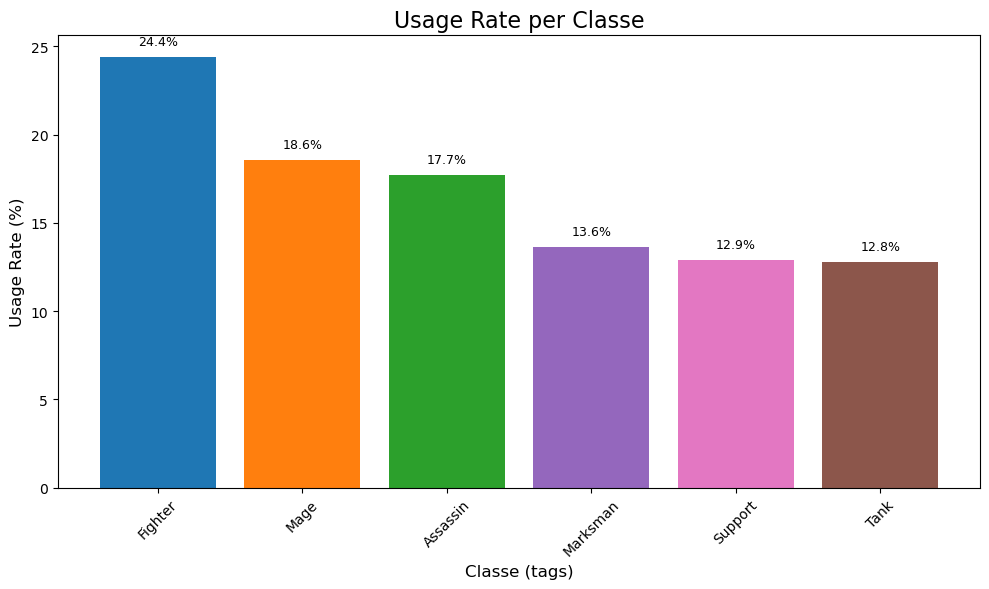

In [47]:


# Impostazioni base
plt.figure(figsize=(10, 6))

colori = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd", "#e377c2", "#8c564b"]
plt.bar(df_class_summary.index, df_class_summary["UsageRate"], color=colori)
# Titolo e assi
plt.title("Usage Rate per Classe", fontsize=16)
plt.xlabel("Classe (tags)", fontsize=12)
plt.ylabel("Usage Rate (%)", fontsize=12)
plt.xticks(rotation=45)

# Etichette sopra le barre
for i, val in enumerate(df_class_summary["UsageRate"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=9)

# Mostra il grafico
plt.tight_layout()
plt.show()

## Regressione lineare tra UsageRate, BanRate e WinRate di un campione

- Date le statistiche trovate precedentemente, come:
    - `UsageRate`
    - `BanRate`
    - `WinRate`
   
   Abbiamo deciso di valutare se poteva avere senso applicare la regressione lineare sui dati ottenuti per
   creare ad esempio un modello di predizione dove dato un certo WinRate di un campione, si poteva stimare
   il suo BanRate e UsageRate.

 


In [48]:
from sklearn.linear_model import LinearRegression

col = ["id", "tags", "name", "title"]
class_championId = df_champions_nameID.loc[df_champions_nameID["id"] != -1, col]
class_championId.columns = ["champion_id", "tags", "name", "title"]
col_df = ["champion_id", "UsageRate", "BanRate", "winRateChamp",
           "name", "title"]

df_Usage_Ban = champ_stats.merge(class_championId, on="champion_id", how="left")[col_df]



# Prepara i dati e i titoli
x_list = [
    df_Usage_Ban["UsageRate"],
    df_Usage_Ban["winRateChamp"],
    df_Usage_Ban["winRateChamp"]
]

y_list = [
    df_Usage_Ban["BanRate"],
    df_Usage_Ban["BanRate"],
    df_Usage_Ban["UsageRate"]
]

x_labels = ["Usage Rate (%)", "Win Rate (%)", "Win Rate (%)"]
y_labels = ["Ban Rate (%)", "Ban Rate (%)", "Usage Rate (%)"]
titles = [
    "Usage vs Ban Rate",
    "Win Rate vs Ban Rate",
    "Win Rate vs Usage Rate"
]




Creamo poi i grafici di tre modelli che potrebbero risultare d'interessere

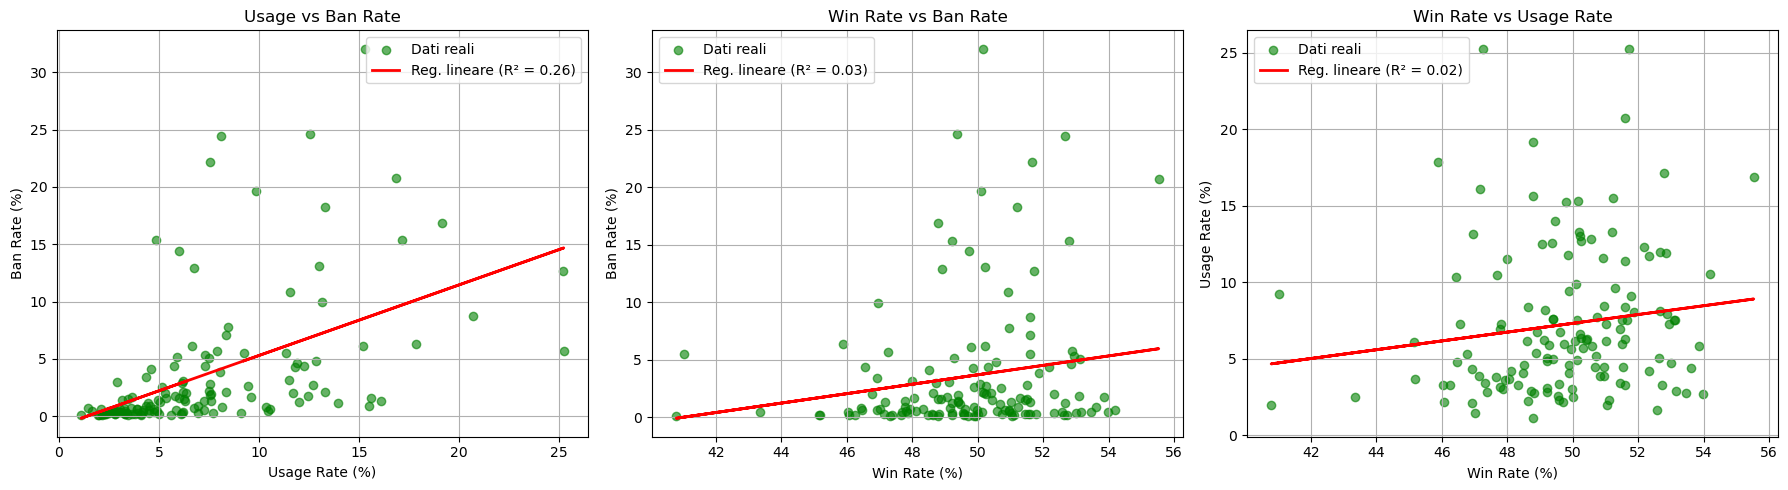

In [49]:
# Crea 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    ax = axes[i]
    x = x_list[i]
    y = y_list[i]
    X = x.values.reshape(-1, 1)
    
    # Fit modello di regressione
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    score = model.score(X, y)
    
    # Plot dati reali e retta di regressione
    ax.scatter(x, y, color="green", alpha=0.6, label="Dati reali")
    ax.plot(x, y_pred, color="red", linewidth=2, label=f"Reg. lineare (R² = {score:.2f})")
    
    ax.set_xlabel(x_labels[i])
    ax.set_ylabel(y_labels[i])
    ax.set_title(titles[i])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Come possiamo vedere, tutti i grafici hanno valori sparsi, perciò la correlazione tra questi dati è pressoché nulla o trascurabile.

In [50]:
#statistiche winrate
winrate = df_Usage_Ban["winRateChamp"]

min_val = winrate.min()
max_val = winrate.max()
mean_val = winrate.mean()
var_val = winrate.var()
std_val = winrate.std()

# Output elegante
print("Statistiche su Win Rate dei Campioni")
print("-" * 40)
print(f"Minimo           : {min_val:.2f}%")
print(f"Massimo          : {max_val:.2f}%")
print(f"Media            : {mean_val:.2f}%")
print(f"Deviazione Std   : {std_val:.2f}")
print(f"Varianza         : {var_val:.2f}")
print("-" * 40)


Statistiche su Win Rate dei Campioni
----------------------------------------
Minimo           : 40.79%
Massimo          : 55.53%
Media            : 49.77%
Deviazione Std   : 2.40
Varianza         : 5.76
----------------------------------------


### Questo ci mostra che:
- `Il gioco è bilanciato`: la varianza nel winRate del personaggi è soltanto di 5.76
- `Ban Casuale`: I campioni più usati non sono per forza quelli che vengono bannati di più, probabilmente dipendono da fattori come l'apprezzamento, la strategia e la popolarità (o infamia) del personaggio stesso



## Correlazione tra early game champions e vittoria

In [60]:
#statistiche winrate
winrate = games_data["gameDuration"]/60

min_val = winrate.min()
max_val = winrate.max()
mean_val = winrate.mean()
var_val = winrate.var()
std_val = winrate.std()

# Output elegante
print("Statistiche su Win Rate dei Campioni")
print("-" * 40)
print(f"Minimo           : {min_val:.2f}")
print(f"Massimo          : {max_val:.2f}")
print(f"Media            : {mean_val:.2f}")
print(f"Deviazione Std   : {std_val:.2f}")
print(f"Varianza         : {var_val:.2f}")
print("-" * 40)

Statistiche su Win Rate dei Campioni
----------------------------------------
Minimo           : 3.17
Massimo          : 78.80
Media            : 30.54
Deviazione Std   : 8.53
Varianza         : 72.82
----------------------------------------


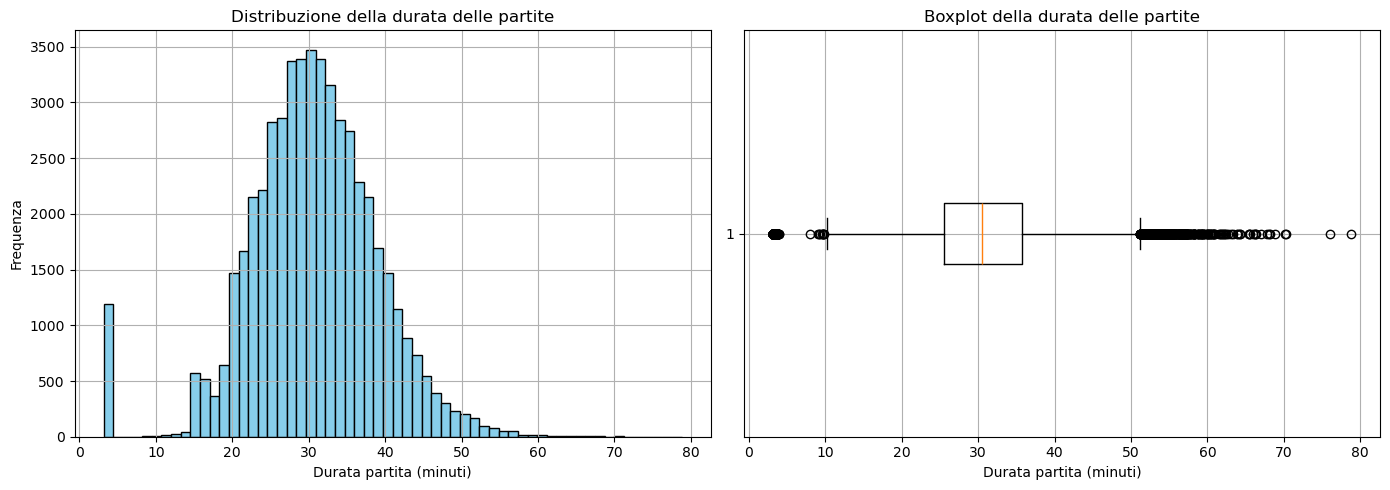

In [67]:
durate_min = games_data["gameDuration"] / 60  
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(durate_min, bins=60, color="skyblue", edgecolor="black")
axes[0].set_title("Distribuzione della durata delle partite")
axes[0].set_xlabel("Durata partita (minuti)")
axes[0].set_ylabel("Frequenza")
axes[0].grid(True)
axes[1].boxplot(durate_min, vert=False)
axes[1].set_title("Boxplot della durata delle partite")
axes[1].set_xlabel("Durata partita (minuti)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [70]:
# Converti durata in minuti
durate = games_data["gameDuration"] / 60

# Calcola i quartili
q1 = durate.quantile(0.25)
q3 = durate.quantile(0.75)

# Categorizza le partite
condizioni = [
    durate <= q1,
    durate >= q3
]

etichette = ["Fast", "Long"]

games_data["DurataPartita"] = np.select(condizioni, etichette, default="Medium")


In [71]:
games_data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,DurataPartita
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,0,0,1,1,114,67,43,16,51,Medium
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,0,0,0,0,11,67,238,51,420,Medium
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,0,0,1,0,157,238,121,57,28,Fast
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,164,18,141,40,51,Medium
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,0,0,1,0,86,11,201,122,18,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,2,0,4,0,55,-1,90,238,157,Medium
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,7,4,4,1,157,55,119,154,105,Long
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,2,0,2,0,113,122,53,11,157,Long
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,3,0,1,0,154,39,51,90,114,Fast


In [76]:
champ_cols = [
    't1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id'
]

# Applichiamo melt per trasformare i 10 campioni in una colonna unica
champions_long = pd.melt(
    games_data,
    id_vars=["gameId", "gameDuration", "winner", "DurataPartita"],
    value_vars=champ_cols,
    var_name="team_slot",
    value_name="champion_id"
)
champions_long["is_win"] = (
    ((champions_long["winner"] == 1) & champions_long["team_slot"].str.startswith("t1")) |
    ((champions_long["winner"] == 2) & champions_long["team_slot"].str.startswith("t2"))
)

# Raggruppa per champion_id e durata categoria
winrate_by_durata = champions_long.groupby(["champion_id", "DurataPartita"])["is_win"].agg(["mean", "count"]).reset_index()
winrate_by_durata.rename(columns={"mean": "winrate", "count": "n_partite"}, inplace=True)

In [77]:
champions_long

,gameId,gameDuration,winner,DurataPartita,team_slot,champion_id,is_win
0,3326086514,1949,1,Medium,t1_champ1id,8,True
1,3229566029,1851,1,Medium,t1_champ1id,119,True
2,3327363504,1493,1,Fast,t1_champ1id,18,True
3,3326856598,1758,1,Medium,t1_champ1id,57,True
4,3330080762,2094,1,Medium,t1_champ1id,19,True
...,...,...,...,...,...,...,...
514895,3308904636,1944,2,Medium,t2_champ5id,79,True
514896,3215685759,3304,2,Long,t2_champ5id,45,True
514897,3322765040,2156,2,Long,t2_champ5id,99,True
514898,3256675373,1475,2,Fast,t2_champ5id,11,True


In [78]:
winrate_by_durata

,champion_id,DurataPartita,winrate,n_partite
0,1,Fast,0.488513,827
1,1,Long,0.514977,868
2,1,Medium,0.503161,1582
3,2,Fast,0.461905,420
4,2,Long,0.492823,418
...,...,...,...,...
409,498,Long,0.501586,1892
410,498,Medium,0.501035,3864
411,516,Fast,0.361014,1144
412,516,Long,0.478884,1326


In [ ]:
if winrate_max_in == "early":
    champ_class = "Early Game"
elif winrate_max_in == "late":
    champ_class = "Late Game"
else:
    champ_class = "Mid Game"

In [100]:
champ_stats

,champion_id,partite_vinte,partite_perse,numero_ban,winRateChamp,PartiteTot,UsageRate,BanRate
1,1.0,1647,1630,2108,50.26,3277,6.36,2.05
2,2.0,751,818,377,47.86,1569,3.05,0.37
3,3.0,1271,1446,2072,46.78,2717,5.28,2.01
4,4.0,1847,1743,284,51.45,3590,6.97,0.28
5,5.0,1674,1571,1357,51.59,3245,6.30,1.32
...,...,...,...,...,...,...,...,...
134,429.0,1707,1865,900,47.79,3572,6.94,0.87
135,432.0,1785,1948,529,47.82,3733,7.25,0.51
136,497.0,3433,3408,2157,50.18,6841,13.29,2.09
137,498.0,3906,3937,6274,49.80,7843,15.23,6.09


In [101]:
scaling_class = (
    winrate_by_durata.sort_values("winrate", ascending=False)
          .drop_duplicates(subset="champion_id")
          .set_index("champion_id")["DurataPartita"]
)

# Risultato: Series champion_id → 'early' / 'mid' / 'late'
scaling_class.name = "scaling_class"
scaling_class = scaling_class.reset_index().sort_values("scaling_class")
col_df = ["champion_id", "scaling_class", 
          "tags", "name", "title"]

scaling_class = scaling_class.merge(class_championId, on="champion_id", how="left")[col_df]

In [102]:
scaling_class

,champion_id,scaling_class,tags,name,title
0,56,Fast,"[Assassin, Fighter]",Nocturne,the Eternal Nightmare
1,68,Fast,"[Fighter, Mage]",Rumble,the Mechanized Menace
2,43,Fast,"[Mage, Support]",Karma,the Enlightened One
3,58,Fast,"[Fighter, Tank]",Renekton,the Butcher of the Sands
4,19,Fast,"[Fighter, Tank]",Warwick,the Uncaged Wrath of Zaun
...,...,...,...,...,...
133,79,Medium,"[Fighter, Mage]",Gragas,the Rabble Rouser
134,74,Medium,"[Mage, Support]",Heimerdinger,the Revered Inventor
135,238,Medium,"[Assassin, Fighter]",Zed,the Master of Shadows
136,112,Medium,[Mage],Viktor,the Machine Herald


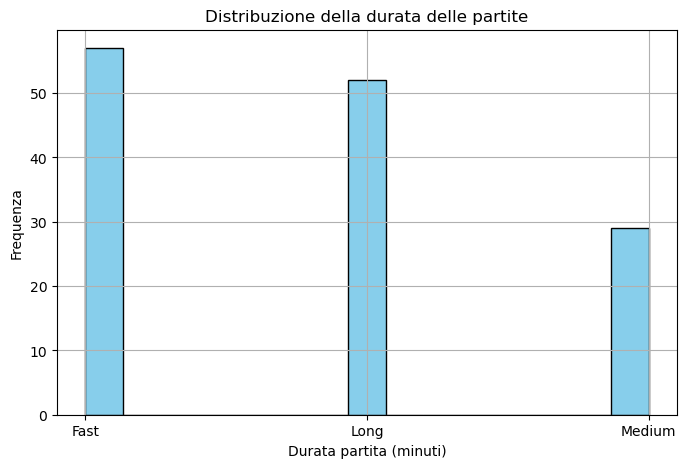

In [104]:
plt.figure(figsize=(8, 5))
plt.hist(scaling_class["scaling_class"], bins=15, color="skyblue", edgecolor="black")
plt.title("Distribuzione della durata delle partite")
plt.xlabel("Durata partita (minuti)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()